# 01. Import Data and Libraries

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
path=r'/Users/nikolinastekovic/Library/CloudStorage/OneDrive-Personal/CF DATA ANALYICS/Immerse/4-Python/Instacart Basket Analysis'

In [5]:
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'instacard_basket_merged.pkl'))

In [6]:
df.shape

(32404859, 34)

In [5]:
df.head()

,order_id,user_id,order_number,Day_of_order,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,frequency_flag,first_name,last_name,gender,state,age,date_joined,n_dependants,marital_status,income
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,False,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,False,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,False,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,False,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


### STEP 3 - You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.

Text(0, 0.5, 'Orders')

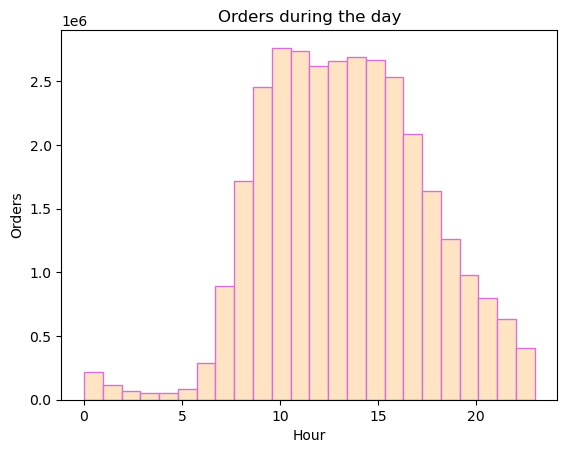

In [10]:
hist = df['order_hour_of_day'].plot.hist(bins = 24, color='bisque', edgecolor='orchid')
plt.title("Orders during the day")
plt.xlabel("Hour")
plt.ylabel("Orders")

Peak hours of the day are from 9 to 14 h. Late night and early morning  hours from 1 to 6 are slowest.

### STEP 4 - The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

Text(0.5, 0, 'Orders')

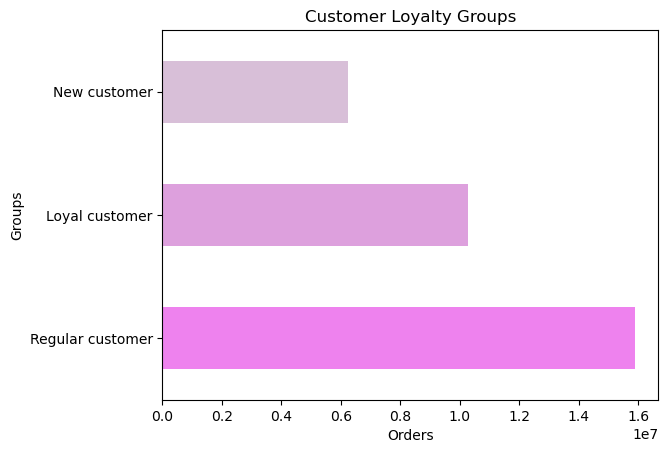

In [37]:
bar = df['loyalty_flag'].value_counts().plot.barh(color=['violet', 'plum', 'thistle'])
plt.title("Customer Loyalty Groups")
plt.ylabel("Groups")
plt.xlabel("Orders")

### STEP 5 - Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. 

In [15]:
# create a random sample
np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

In [16]:
# create dataframe big and small
big = df[dev]
small = df[~dev]

In [17]:
# check - sum of rows
len(big)+len(small)

32404859

In [18]:
# check - length of table
len(df)

32404859

### Same!

In [19]:
# subset dataframe that contains only the “prices” and “order_hour_of_day” columns from your small subset.
df_2 = small[['order_hour_of_day','prices']]

Text(0, 0.5, 'Prices')

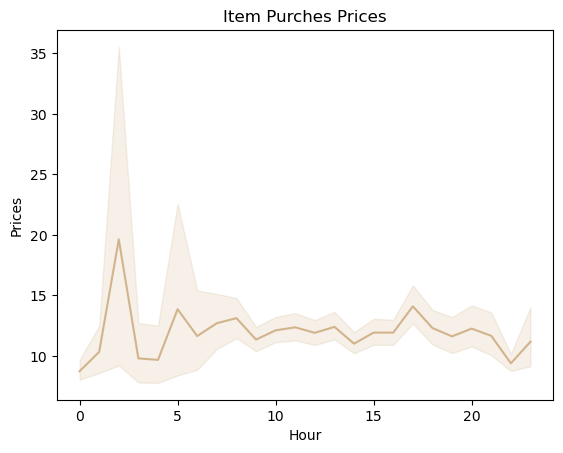

In [24]:
line = sns.lineplot(data = df_2, x = 'order_hour_of_day',y = 'prices', color='tan')
plt.title("Item Purches Prices")
plt.xlabel("Hour")
plt.ylabel("Prices")

### STEP 6 - Determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents

Text(0, 0.5, 'Cusomers')

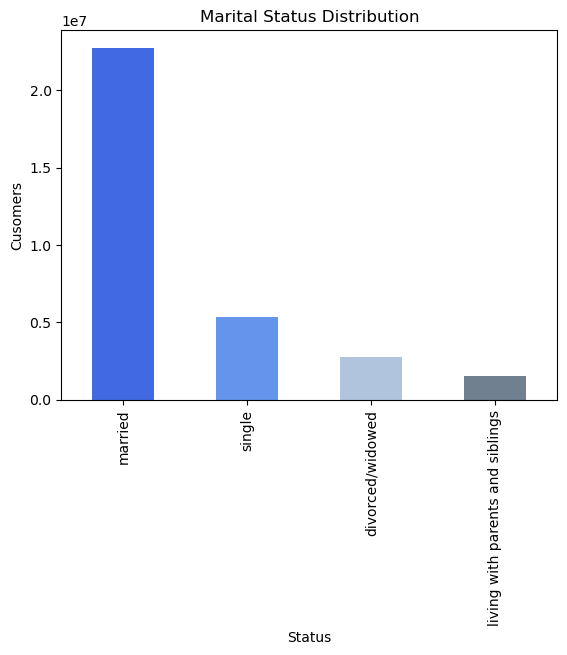

In [22]:
# marital status distribution
bar_marital = df['marital_status'].value_counts().plot.bar(color=['royalblue', 'cornflowerblue', 'lightsteelblue', 'slategrey'])
plt.title("Marital Status Distribution")
plt.xlabel("Status")
plt.ylabel("Cusomers")

In [29]:
# subset dataframe that contains only the “age” and “number_of_dependants” columns from your small subset.
df_3 = small[['n_dependants','age']]

Text(0, 0.5, 'Number of Dependants')

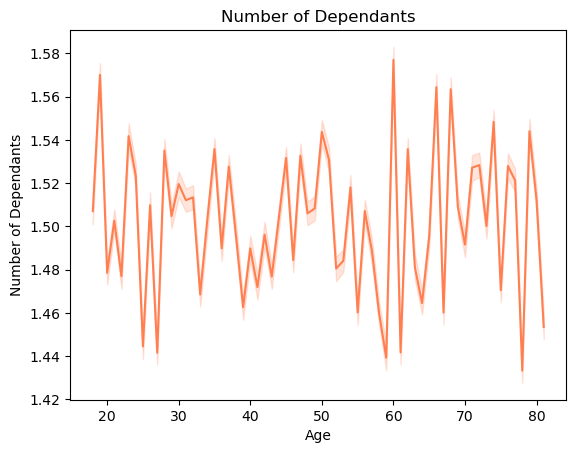

In [30]:
# line chart exploring age and number of dependants
line_2 = sns.lineplot(data = df_3, x = 'age',y = 'n_dependants', color='coral')
plt.title("Number of Dependants")
plt.xlabel("Age")
plt.ylabel("Number of Dependants")

There doesn't seem to be any connection between age and number of dependandts.  Most of the users are married.

### STEP 7 - You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.

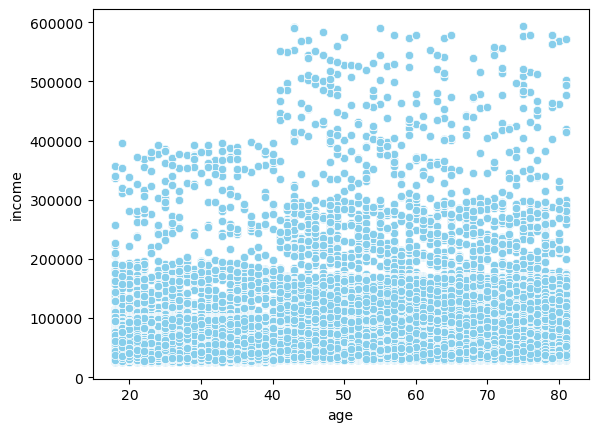

In [28]:
scatter_plot = sns.scatterplot(x = 'age', y = 'income',data = small, color='skyblue')


There is higher number of user with income over 300000 who are older than 40 years old. In the age group under 40 years old there are no users whose income is over 400000.

In [31]:
#export scatterplot
scatter_plot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'instacart_scatter.png'))

In [32]:
#export line_2
line_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'instacart_line_age.png'))

In [33]:
#export bar marital status distr.
bar_marital.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'instacart_marital.png'))

In [34]:
#export line_1
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'instacart_line_prices.png'))

In [38]:
#export bar loyalty
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'instacart_bar_loyalty.png'))

In [36]:
#save histogram
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'instacart_hist_orders.png'))